In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## Getting Dataset

In [3]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = True, transform = transforms.Compose([transforms.ToTensor()]))
test_dataset = torchvision.datasets.FashionMNIST(root='./data', download= True, train = False, transform = transforms.Compose([transforms.ToTensor()]))

BATCH_SIZE = 128

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=BATCH_SIZE)

In [4]:
from utils import train_loop, test_loop
from models import CNN_no_maxpool

num_epochs = 20
lr = 0.001

model = CNN_no_maxpool()
model.to(device= device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = lr)

tr_acc, te_acc = [], []
tr_loss, te_loss = [], []

best_acc = 0

for epoch in range(num_epochs):
    train_loss, train_correct = train_loop(train_loader, model, loss_fn, optimizer, device)
    test_loss, test_correct = test_loop(test_loader, model, loss_fn, device)

    print('Train Acc epoch {} : {} '.format(epoch, train_correct))
    print('Test Acc epoch {} : {} '.format(epoch, test_correct))

    tr_acc.append(train_correct)
    te_acc.append(test_correct)

    tr_loss.append(train_loss)
    te_loss.append(test_loss)


c:\Users\ianch\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Acc epoch 0 : 0.8297 
Test Acc epoch 0 : 0.8633 
Train Acc epoch 1 : 0.88955 
Test Acc epoch 1 : 0.8515 
Train Acc epoch 2 : 0.91055 
Test Acc epoch 2 : 0.8929 
Train Acc epoch 3 : 0.9229833333333334 
Test Acc epoch 3 : 0.8949 
Train Acc epoch 4 : 0.9349666666666666 
Test Acc epoch 4 : 0.905 
Train Acc epoch 5 : 0.9461 
Test Acc epoch 5 : 0.8904 
Train Acc epoch 6 : 0.9554166666666667 
Test Acc epoch 6 : 0.8852 
Train Acc epoch 7 : 0.9630166666666666 
Test Acc epoch 7 : 0.878 
Train Acc epoch 8 : 0.9646 
Test Acc epoch 8 : 0.8908 
Train Acc epoch 9 : 0.96845 
Test Acc epoch 9 : 0.8923 
Train Acc epoch 10 : 0.97225 
Test Acc epoch 10 : 0.8923 
Train Acc epoch 11 : 0.9757833333333333 
Test Acc epoch 11 : 0.897 
Train Acc epoch 12 : 0.9793833333333334 
Test Acc epoch 12 : 0.8886 
Train Acc epoch 13 : 0.9810833333333333 
Test Acc epoch 13 : 0.8876 
Train Acc epoch 14 : 0.9821333333333333 
Test Acc epoch 14 : 0.8935 
Train Acc epoch 15 : 0.9856166666666667 
Test Acc epoch 15 : 0.8885 

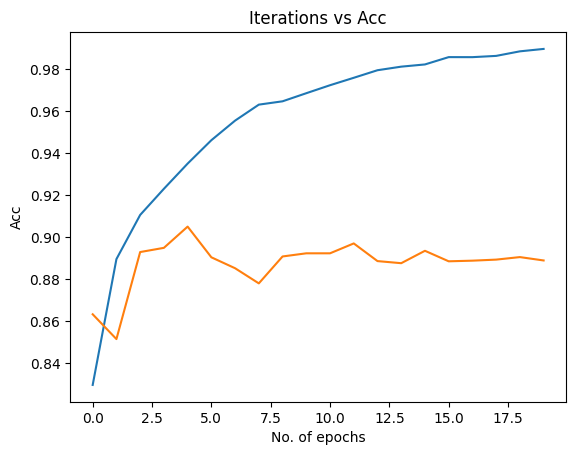

In [8]:
plt.plot(range(num_epochs), tr_acc)
plt.plot(range(num_epochs), te_acc)
plt.xlabel("No. of epochs")
plt.ylabel("Acc")
plt.title("Iterations vs Acc")
plt.show()

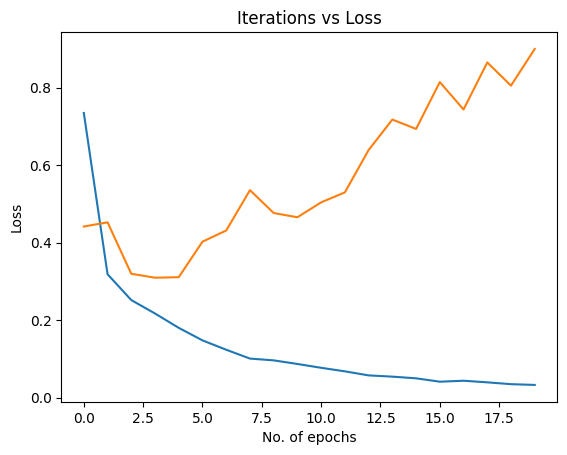

In [9]:
plt.plot(range(num_epochs), tr_loss)
plt.plot(range(num_epochs), te_loss)
plt.xlabel("No. of epochs")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

In [10]:
print("Best Acc : {} | Best Epoch : {}".format(max(te_acc), te_acc.index(max(te_acc))))

Best Acc : 0.905 | Best Epoch : 4


## Pickle out results and accuracies

In [12]:
import pickle
import os

file_name = 'baseline_CNN_no_MaxPool.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'wb') as file:
    pickle.dump(tr_acc, file)
    pickle.dump(te_acc, file)
    pickle.dump(tr_loss, file)
    pickle.dump(te_loss, file)

## Pickle in results and accuracies

In [15]:
file_name = 'baseline_CNN_no_MaxPool.pkl' 

with open(os.getcwd() + '/results/' + file_name, 'rb') as file:
    tr_acc = pickle.load(file)
    te_acc = pickle.load(file)
    tr_loss = pickle.load(file)
    te_loss = pickle.load(file)


print(tr_acc)
print(te_acc)
print(tr_loss)
print(te_loss)

[0.8297, 0.88955, 0.91055, 0.9229833333333334, 0.9349666666666666, 0.9461, 0.9554166666666667, 0.9630166666666666, 0.9646, 0.96845, 0.97225, 0.9757833333333333, 0.9793833333333334, 0.9810833333333333, 0.9821333333333333, 0.9856166666666667, 0.9856, 0.9862, 0.9883666666666666, 0.9895166666666667]
[0.8633, 0.8515, 0.8929, 0.8949, 0.905, 0.8904, 0.8852, 0.878, 0.8908, 0.8923, 0.8923, 0.897, 0.8886, 0.8876, 0.8935, 0.8885, 0.8888, 0.8893, 0.8905, 0.8889]
[0.7348602031911614, 0.31863437894819135, 0.2519175634582414, 0.217211792606916, 0.18018034508805286, 0.14787051820758182, 0.12371097365692099, 0.10090189006155742, 0.0962443958058445, 0.08696686826558954, 0.07708128743858607, 0.06793499738672998, 0.05749451104940763, 0.05423932933687433, 0.04993547956451281, 0.04119236485065539, 0.04369607688223661, 0.039551791582524136, 0.034807413091648746, 0.03288065941906524]
[0.44178821580319466, 0.4526321952101551, 0.31973206355601924, 0.3096978164549115, 0.3109995408714572, 0.4026854866290394, 0.43